Importer les bibliotheques

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

Chargement de DATASET iris

In [2]:
iris = load_iris()

# Creation d’un DataFrame pandas
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

#  Ajout des noms des especes
df['species_name'] = df['species'].apply(lambda x: iris.target_names[x])

# Petit vue sur les donnees
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


---
Étape 2 : Visualisation des données

Objectif :

Comprendre la répartition des données et voir quelles caractéristiques permettent de distinguer les espèces.

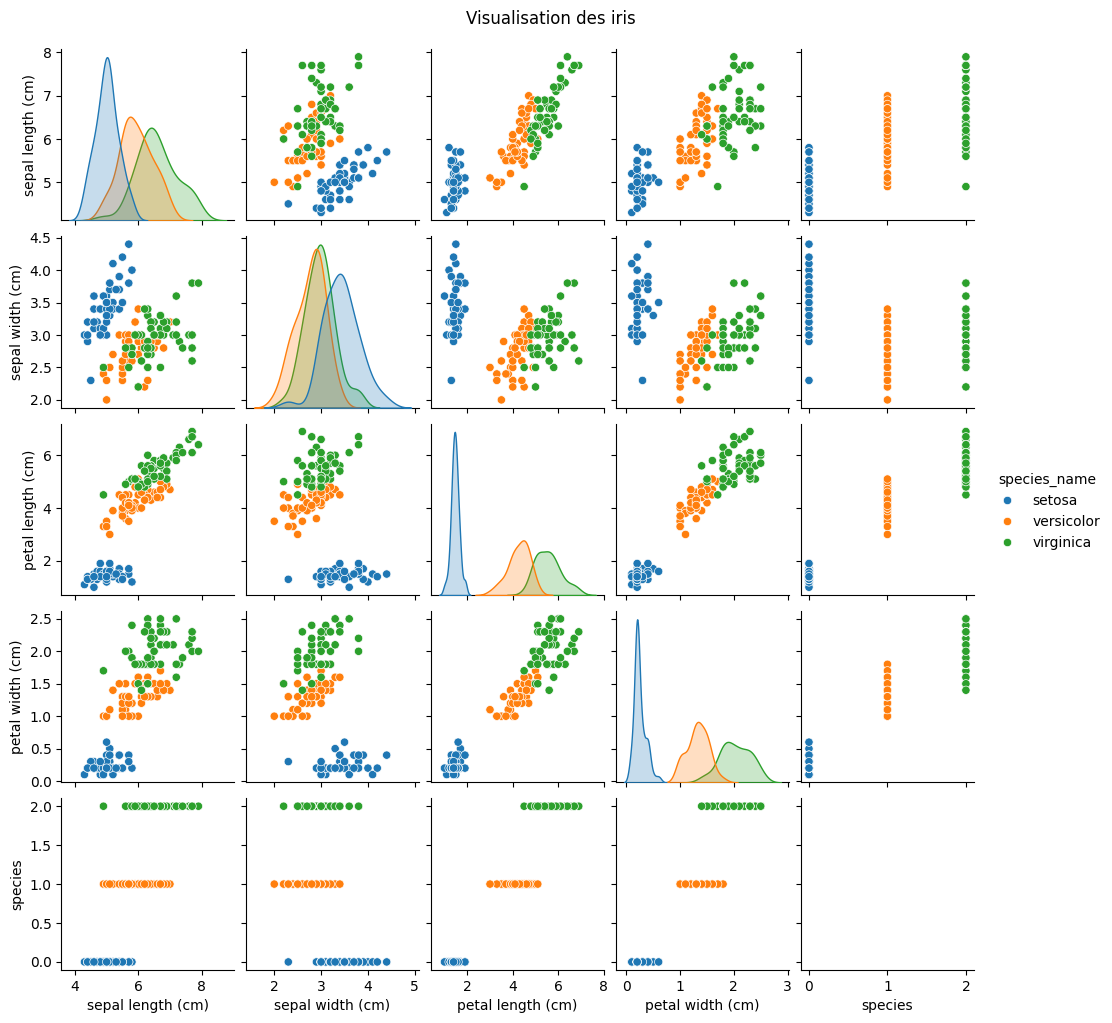

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot : graphique croisé des caractéristiques
sns.pairplot(df, hue='species_name', height=2)
plt.suptitle("Visualisation des iris", y=1.02)
plt.show()


---
Matrice de correlation

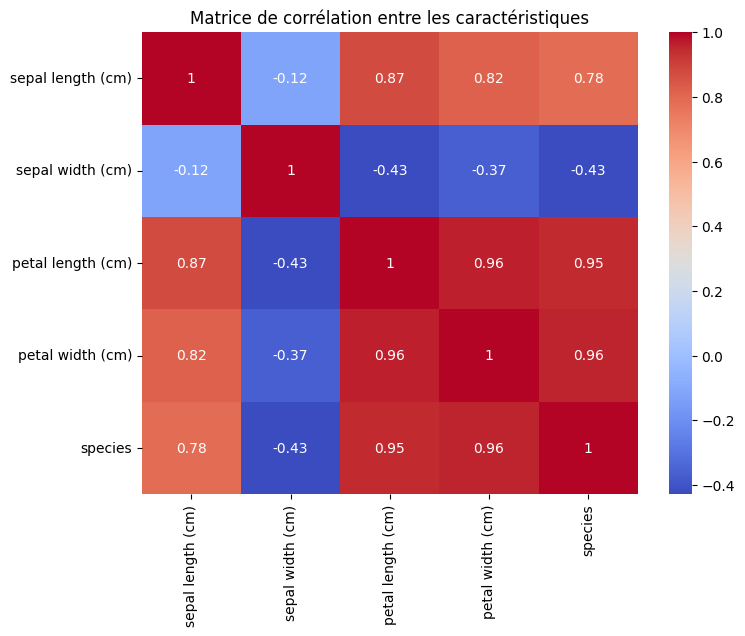

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns='species_name').corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation entre les caractéristiques")
plt.show()

---
Étape 3 : Préparation des données

Objectif :

Diviser le dataset en données d'entraînement et données de test pour pouvoir entraîner et évaluer notre modèle.

In [5]:
from sklearn.model_selection import train_test_split

# Caractéristiques (X) et cibles (y)
X = df[iris.feature_names]  # Toutes les colonnes sauf les espèces
y = df['species']           # Les labels (0, 1, 2)

# Division des données en ensemble d'entraînement (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Affichage des dimensions
print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)

Taille du jeu d'entraînement : (120, 4)
Taille du jeu de test : (30, 4)


---
Étape 4 : Entraînement du modèle k-Nearest Neighbors (k-NN)

Objectif :

Entraîner un modèle de classification qui apprendra à prédire l'espèce d'une fleur selon ses mesures.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Initialisation du modèle k-NN avec k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Entraînement du modèle
knn.fit(X_train, y_train)

print("Modèle entraîné avec succès !")

Modèle entraîné avec succès !


---
Étape 5 : Évaluation du modèle

Objectif :

Tester le modèle sur des données qu’il n’a jamais vues pour vérifier s’il généralise bien.

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prédictions sur les données de test
y_pred = knn.predict(X_test)

# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

# Rapport de classification détaillé
print("\nRapport de classification :")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Précision du modèle : 1.00

Rapport de classification :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



---
Matrice de confusion
---

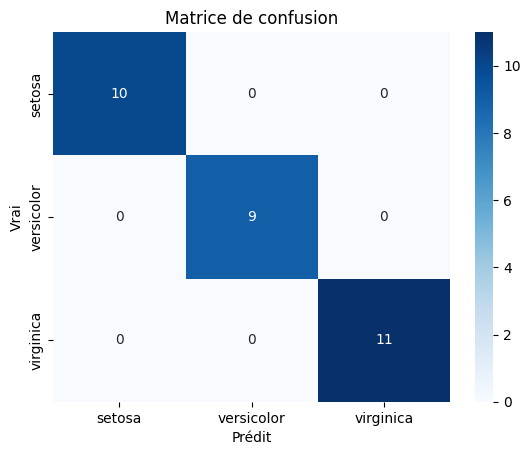

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.title("Matrice de confusion")
plt.show()

---
Étape 6 : Interface avec ipywidgets pour la prediction personaliser

Objectif :

Créer une interface dans Jupyter Notebook pour saisir des mesures et voir la prédiction du modèle en direct.

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# 1. Création des widgets pour chaque caractéristique
sepal_length = widgets.FloatSlider(value=5.0, min=4.0, max=8.0, step=0.1, description='Sepal Length')
sepal_width = widgets.FloatSlider(value=3.0, min=2.0, max=4.5, step=0.1, description='Sepal Width')
petal_length = widgets.FloatSlider(value=1.5, min=1.0, max=7.0, step=0.1, description='Petal Length')
petal_width = widgets.FloatSlider(value=0.2, min=0.1, max=2.5, step=0.1, description='Petal Width')

# 2. Bouton de prédiction
predict_button = widgets.Button(description="Prédire l'espèce")

# 3. Affichage du résultat
output = widgets.Output()

# 4. Fonction de prédiction
def predict_species(b):
    with output:
        output.clear_output()
        features = [[
            sepal_length.value,
            sepal_width.value,
            petal_length.value,
            petal_width.value
        ]]
        prediction = knn.predict(features)[0]
        species_name = iris.target_names[prediction]
        print(f" Espèce prédite : {species_name}")

# 5. Lier le bouton à la fonction
predict_button.on_click(predict_species)

# 6. Affichage de l’interface
display(sepal_length, sepal_width, petal_length, petal_width, predict_button, output)


FloatSlider(value=5.0, description='Sepal Length', max=8.0, min=4.0)

FloatSlider(value=3.0, description='Sepal Width', max=4.5, min=2.0)

FloatSlider(value=1.5, description='Petal Length', max=7.0, min=1.0)

FloatSlider(value=0.2, description='Petal Width', max=2.5, min=0.1)

Button(description="Prédire l'espèce", style=ButtonStyle())

Output()